In [385]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Провести EDA

In [386]:
data = pd.read_csv("data.csv")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [387]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [388]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# 2. Заполняем пропуски

In [389]:
# У нас не хватает данных о Item_Weight, Outlet_Size
# Item weight я решил заполнить средними значениями и выкидывать почти 30% датасета изза того что у нас нет данных о 
# Outlet Size тоже не хочется поэтому я тоже заполню его средними значениями


In [390]:
data.fillna(data.mean(), inplace = True)

In [391]:
#Посмотрим каких значений Outlet_Size больше всего чтобы заполнить ими недостающие

In [392]:
data.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [393]:
data["Outlet_Size"].fillna("Medium", inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [394]:
#Можем смело удалить айдишники магазина и товара - они ни на что не должны влиять

In [395]:
data.drop(["Item_Identifier","Outlet_Identifier"], axis = 1, inplace = True )
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


# 3.Обрабатываем категориальные признаки 

In [396]:
#С пропусками разобрались - теперь нам нужно закодировать категориальные переменные

In [397]:
print(data.Item_Fat_Content.value_counts())
print(" - - - - - - - - - - - - ")
print(" - - - - - - - - - - - - ")
print(data.Item_Type.value_counts())
print(" - - - - - - - - - - - - ")
print(" - - - - - - - - - - - - ")
print(data.Outlet_Size.value_counts())
print(" - - - - - - - - - - - - ")
print(" - - - - - - - - - - - - ")
print(data.Outlet_Location_Type.value_counts())
print(" - - - - - - - - - - - - ")
print(" - - - - - - - - - - - - ")
print(data.Outlet_Type.value_counts())

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
 - - - - - - - - - - - - 
 - - - - - - - - - - - - 
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
 - - - - - - - - - - - - 
 - - - - - - - - - - - - 
Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64
 - - - - - - - - - - - - 
 - - - - - - - - - - - - 
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
 - - - - - - - - - - - - 
 - - - - - - - - - - - - 
Su

In [398]:
# Создаем дамми-переменные для категорий
dummy_data = pd.get_dummies(data)

In [399]:
dummy_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


# 4. Изучаем корреляцию признаков с данными о продажах

In [400]:
# Посмотрим на распределение продаж

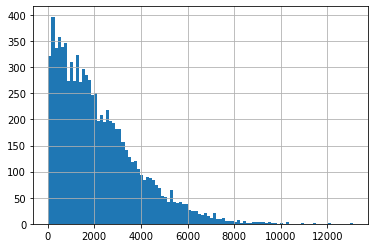

In [401]:

data.Item_Outlet_Sales.hist(bins=100)

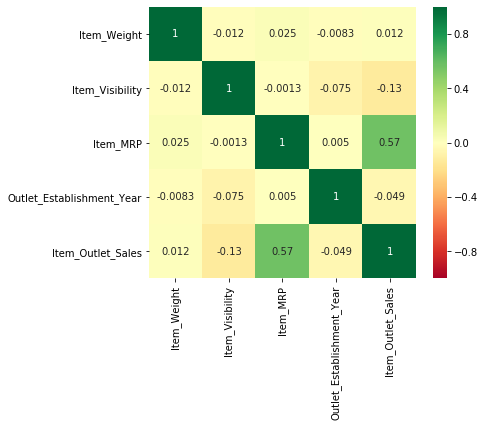

In [402]:
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn",vmin=-1,vmax=1);

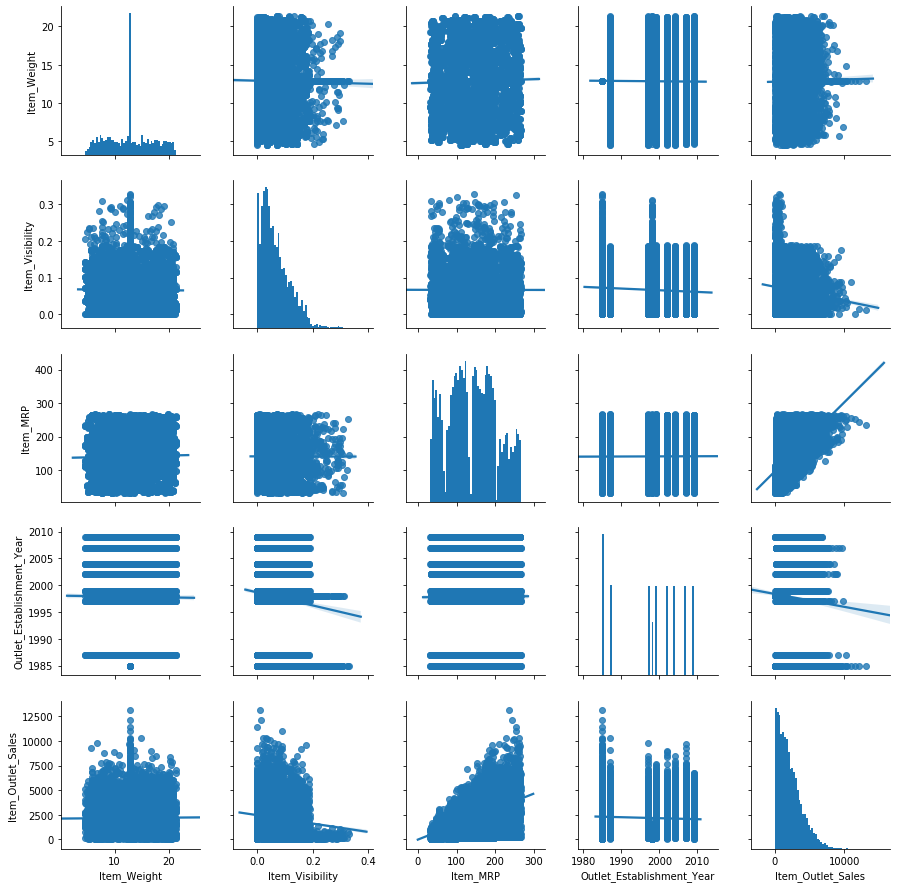

In [247]:
sns.pairplot(data, kind='reg', diag_kws=dict(bins=50))

In [403]:
# Наблюдаем сильную корреляцию Item_MRP и Item_Outlet_Sales

# 5.Выбрать и обосновать метрику, на основе которой будем измерять качество полученной модели

In [404]:
# Так как мы можем заметить что у нас данные по целевой переменной очень сильно отличаюся то 
# выбор в пользу Root Mean Square Error нецелесообразен. Чтобы не получать большое пенальти
# за этот разброс значительно лучше должен показать себя Mean Absolute Error так как вместо
# квадрата мы будем иметь дело с модулем.

In [405]:
#Разбиваем наш датасет на train и test

In [406]:
X = dummy_data.drop("Item_Outlet_Sales", axis = 1)
y = dummy_data["Item_Outlet_Sales"]
X.head()
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [407]:
from sklearn.model_selection import train_test_split

In [408]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_prev = X_train

# 6. Строим и подбираем оптимальные параметры для любой линейной модели

In [409]:
# Для начала нужно нормализировать данные для линейной модели

In [410]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [411]:
sc = StandardScaler()


X_train = sc.fit_transform(X_train.values)
X_test = sc.transform(X_test.values)


In [412]:
X_train =pd.DataFrame(X_train, columns=X_prev.columns)
X_test = pd.DataFrame(X_test, columns=X_prev.columns)

In [413]:
# Строим Linear regression

In [414]:
from sklearn.linear_model import LinearRegression
lr_param_grid = dict(fit_intercept = [False, True],
                     normalize = [False, True],
                     copy_X  = [False, True])
lr = LinearRegression()
lr_grid = GridSearchCV(lr, lr_param_grid,  cv=10, scoring='neg_mean_absolute_error',n_jobs=-1)
lr_grid.fit(X_train, y_train)
print(lr_grid.best_score_)
print(lr_grid.best_params_)
print(lr_grid.best_estimator_)

best_linear = lr_grid.best_estimator_

mean_absolute_error(y_test, best_linear.predict(X_test))

-836.8212162190284
{'copy_X': False, 'fit_intercept': True, 'normalize': False}
LinearRegression(copy_X=False, fit_intercept=True, n_jobs=None, normalize=False)


850.8602831134114

# 7.Построить и подобрать оптимальные параметры для любой нелинейной модели

In [415]:
# Строим Random Forest

In [416]:
%time
from sklearn.ensemble import RandomForestRegressor
rf_param_grid = dict(n_estimators = range(1,15, 1), max_depth = range(1, 15))
rf = RandomForestRegressor()
rf_grid = GridSearchCV(rf, rf_param_grid,  cv=10, scoring='neg_mean_absolute_error',n_jobs=-1)
rf_grid.fit(X_train, y_train)
print(rf_grid.best_score_)
print(rf_grid.best_params_)
print(rf_grid.best_estimator_)
best_rf = rf_grid.best_estimator_
mean_absolute_error(y_test, best_rf.predict(X_test))

CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 7.15 µs
-755.4113515869341
{'max_depth': 6, 'n_estimators': 13}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=13,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


759.7531684284509

In [419]:
# Random Forest операжает Linear Regression

# 8.Провести стекинг нескольких моделей

In [420]:
# def get_meta_features(clf, X_train, y_train, X_test, stack_cv):
#     meta_train = np.zeros_like(y_train, dtype=float)
#     meta_test = np.zeros_like(y_test, dtype=float)
    
#     for i, (train_ind, test_ind) in enumerate(stack_cv.split(X_train, y_train)):
        
#         clf.fit(X_train.iloc[train_ind], y_train.iloc[train_ind])
#         meta_train[test_ind] = clf.predict(X_train.iloc[test_ind])
#         meta_test += clf.predict(X_test)
    
#     return meta_train, meta_test / stack_cv.n_splits



def get_meta_features(clf, X_train, y_train, X_valid, y_valid, stack_cv):
    '''
    Function to prepare meta-features to train new model based on stacked-models prediction and y_actual
    Output: X of predictions of sub-models on TRAIN, and X of prediction of sub-models on VALID/TEST datasets
    '''
    meta_train = np.zeros_like(y_train, dtype=float)
    meta_valid = np.zeros_like(y_valid, dtype=float)
    
    for i, (train_ind, valid_ind) in enumerate(stack_cv.split(X_train, y_train)):
        
        clf.fit(X_train.iloc[train_ind], y_train.iloc[train_ind])
        meta_train[valid_ind] = clf.predict(X_train.iloc[valid_ind])
        meta_valid += clf.predict(X_valid)
    
    return meta_train, meta_valid / stack_cv.n_splits

In [421]:
from sklearn.model_selection import  KFold


In [422]:
N_FOLDS = 5
X_train.shape
X_test.shape


(1705, 35)

In [427]:
stack_cv = KFold(n_splits=N_FOLDS)

meta_train = []
meta_test = []
col_names = []

# Получаем предсказания для мета фич для linear regression
meta_tr, meta_te = get_meta_features(best_linear, X_train, y_train, X_test, y_test, stack_cv)

meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('lr_pred')

# Получаем предсказания для мета фич для linear regression RandomForest model
meta_tr, meta_te = get_meta_features(best_rf, X_train, y_train, X_test,y_test, stack_cv)

meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('rf_pred')

In [428]:

# преобразовываем в пандас датафрэйм
X_meta_train = pd.DataFrame(np.stack(meta_train, axis=1), columns=col_names)
X_meta_test = pd.DataFrame(np.stack(meta_test, axis=1), columns=col_names)


In [429]:
# Теперь с помощью linear regression сделаем предсказания на мета выборке

In [436]:
model_lr_meta = LinearRegression(n_jobs=-1)
model_lr_meta.fit(X_meta_train, y_train)

mean_absolute_error(y_train ,model_lr_meta.predict(X_meta_train) )

760.9844962395848

In [437]:
# посмотрим на важность критериев выбора модели

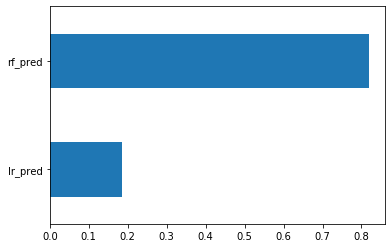

In [438]:
pd.Series(model_lr_meta.coef_.flatten(), index=X_meta_train.columns).plot(kind='barh')

# 9. Оценить качество модели на отложенной выборке


In [450]:
# посмотрим сперва на качество наших простых моделей:


In [452]:
print("Linear Regression on test : {} " .format(mean_absolute_error(y_test, best_linear.predict(X_test))))
print("Random Forest Regression on test : {} " .format(mean_absolute_error(y_test, best_rf.predict(X_test))))
print("Stacking on test : {} " .format(mean_absolute_error(y_test, model_lr_meta.predict(X_meta_test))))

Linear Regression on test : 851.0073949941296 
Random Forest Regression on test : 763.1867540542039 
Stacking on test : 767.6667097778229 


In [455]:
# Как видим из результатов лучший результат получился на RandomForest. Видимо линейная регрессия все делает только хуже и ее использование 
# здесь было плохой идеей.

# 10. Выбрать топ 3 признака больше всего влияющие на объемы продаж

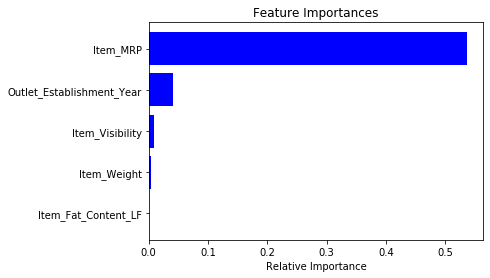

In [461]:
features = X_train.columns
importances = best_rf.feature_importances_[0:5]
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [462]:
# Как мы видим самая важная фича - ITEM MRP(максимальная цена продажи), Outlet Establishment Year(год открытия магазина) и 
# на 3-ем месте Item Visibility - (% отведенных полок под данный товар)